# Distance workflow

In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

Requires a 2D numpy array with zeros and ones as input

In [2]:
def calculate_distance(arr, max_distance=20, dtype=np.float32):
    """
    Calculate normalized distance from 1's in the input array.

    Args:
    arr (np.ndarray): Input binary array.
    max_distance (float): Maximum distance to consider (default: 20).
    dtype (np.dtype): Data type for the output array (default: np.float32).

    Returns:
    np.ndarray: Normalized distance array.
    """
    # Ensure input is a numpy array
    arr = np.asarray(arr, dtype=bool)

    # Calculate the distance transform
    dist = distance_transform_edt(~arr)

    # Normalize the distance
    normalized_dist = np.clip(1 - dist / max_distance, 0, 1)

    return normalized_dist.astype(dtype)

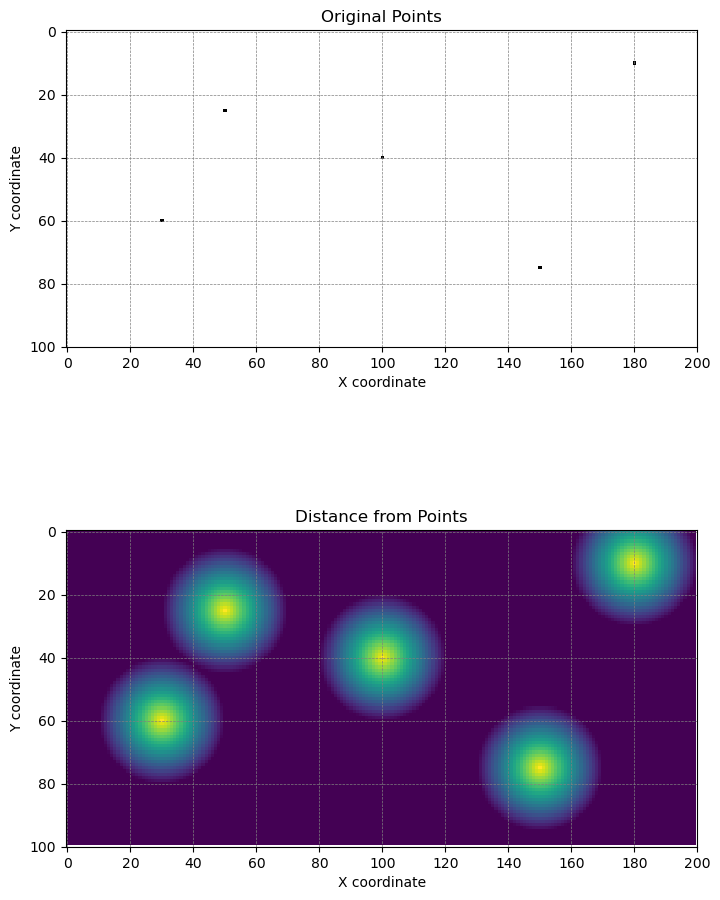

In [4]:
# Create an array with multiple points
arr = np.zeros((100, 200))
points = [
    (25, 50),
    (75, 150),
    (40, 100),
    (60, 30),
    (10, 180)
]

for point in points:
    arr[point] = 1

# Calculate the distance
result = calculate_distance(arr)



# Create figure with subfigures----------------------------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(8, 10))
subfigs = fig.subfigures(2, 1, height_ratios=[1, 1.1])  # Slightly more height for bottom plot to accommodate colorbar

# Top plot: Just the points
ax1 = subfigs[0].add_subplot(111)
im1 = ax1.imshow(arr, cmap='binary', aspect='equal')
ax1.set_title('Original Points')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')

# Bottom plot: Distance calculation result
ax2 = subfigs[1].add_subplot(111)
im2 = ax2.imshow(result, cmap='viridis', aspect='equal')
ax2.set_title('Distance from Points')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')

# Add color bar to the second plot
# cbar = subfigs[1].colorbar(im2, ax=ax2, label='Normalized Distance')

# Add grid lines every 20 points for both plots
for ax in [ax1, ax2]:
    ax.set_xticks(np.arange(0, 201, 20))
    ax.set_yticks(np.arange(0, 101, 20))
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)  # Ensure grid is behind the data

plt.tight_layout()
plt.show()

In [5]:
# Create an empty array
arr2 = np.zeros((100, 200), dtype=int)

# Add moderate-length lines
arr2[80, 20:40] = 1  # horizontal line, 20 pixels long
arr2[15, 140:165] = 1  # horizontal line, 25 pixels long
arr2[40:60, 70] = 1  # vertical line, 20 pixels long
arr2[25:45, 160] = 1  # vertical line, 20 pixels long
for i in range(15):
    arr2[85-i, 110+i] = 1  # diagonal line, about 21 pixels long

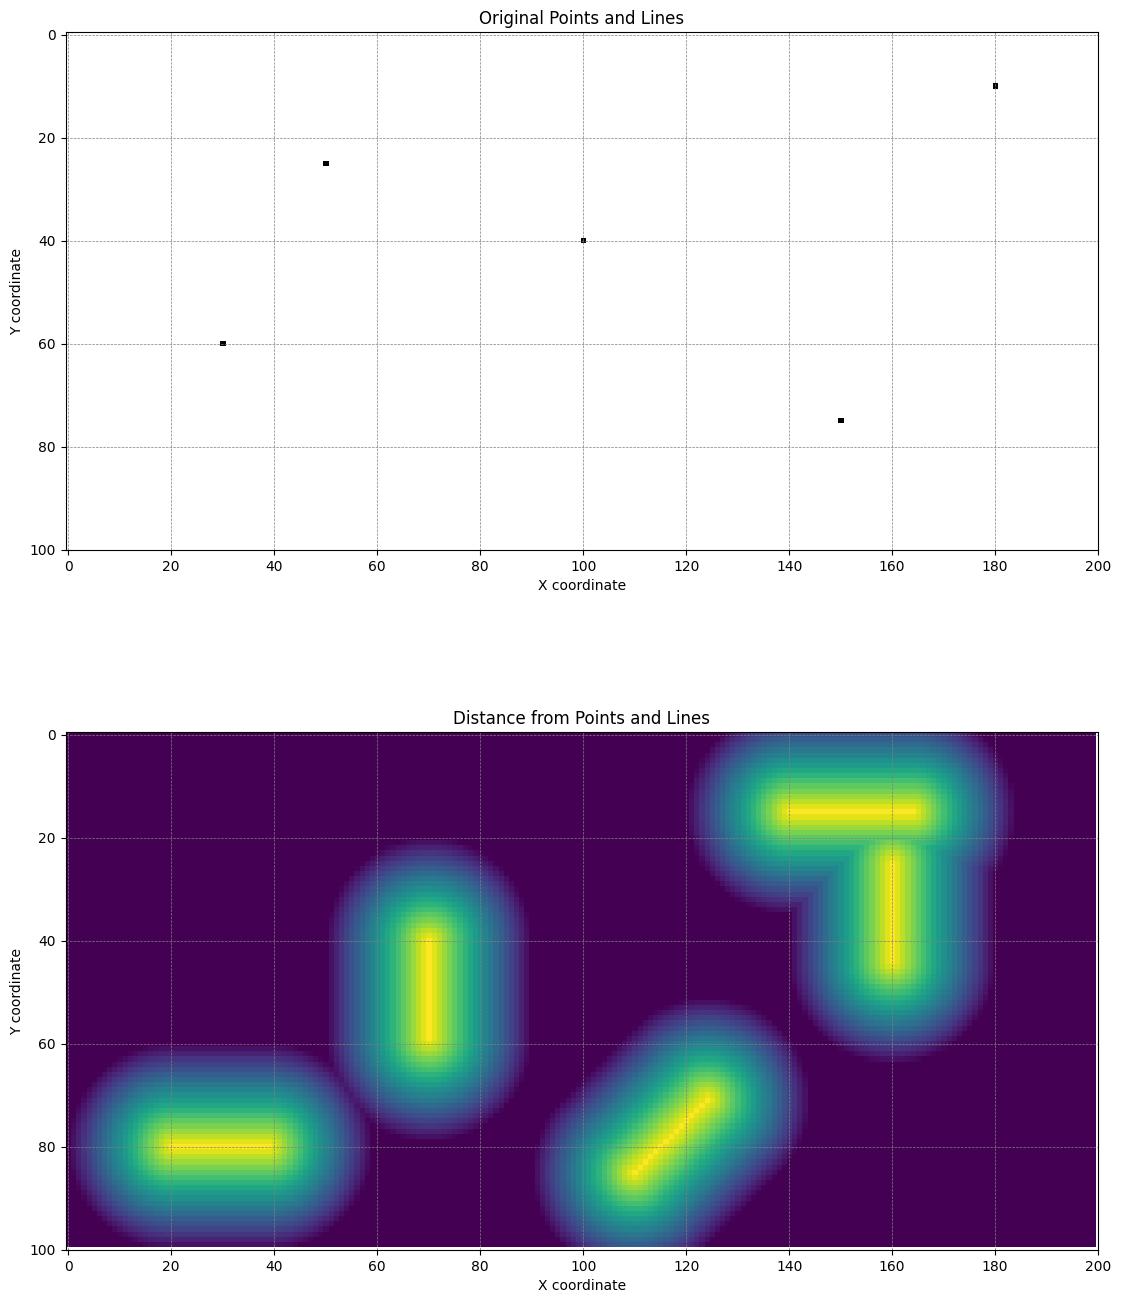

In [5]:
# Calculate the distance
result = calculate_distance(arr2)

# Create figure with subfigures------------------------------------------------------------------------
fig = plt.figure(figsize=(12, 14))
subfigs = fig.subfigures(2, 1, height_ratios=[1, 1.1])

# Top plot: Points and lines
ax1 = subfigs[0].add_subplot(111)
im1 = ax1.imshow(arr, cmap='binary', aspect='equal')
ax1.set_title('Original Points and Lines')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')

# Bottom plot: Distance calculation result
ax2 = subfigs[1].add_subplot(111)
im2 = ax2.imshow(result, cmap='viridis', aspect='equal')
ax2.set_title('Distance from Points and Lines')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')

# Add color bar to the second plot
#cbar = subfigs[1].colorbar(im2, ax=ax2, label='Normalized Distance')

# Add grid lines every 20 points for both plots
for ax in [ax1, ax2]:
    ax.set_xticks(np.arange(0, 201, 20))
    ax.set_yticks(np.arange(0, 101, 20))
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)  # Ensure grid is behind the data

plt.tight_layout()
plt.show()